# Исследование объявлений о продаже квартир

**Описание проекта**
    
- В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
- Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
- О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

**Задачи проекта**
    
- Изучить параметры объектов.
- Изучить, как быстро продавались квартиры.
- Определить какие факторы больше всего влияют на общую стоимость объекта.
- Посчитайть среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- Выделить квартиры в зависимости от населенного пункта и вычислить среднюю цену каждого километра до центра города. Описать, как стоимость объектов зависит от расстояния до центра города.

## Открываем файл с данными и изучаем общую информацию

In [1]:
# загружаем необходимые библиотеки

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# загрузим файл и выведем первые 10 строк

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Загрузил библиотеки в отдельной ячейке, применил метод для отображение всех колонок

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
df.shape # считаем общее количество строк и столбцов

(23699, 22)

**В дата сете указаны объкты недвижимости со следующими параметрами, всего колонок 22:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

**Всего записей об обьектах недвижимости: 23699**

Приведем названия колонок к единому стандарту, перепишем названия в "змеином регистре"

In [5]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

In [6]:
df.columns # проверям название колонок

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Воспользуемся методом описательной статистики

In [7]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


- Обратим внимание на данные в столбце ceiling_height, максимальное значение высоты потолка равно 100 м, это не сильно влияет на соотношение медианы и среднего арифметического, в дальнейшем определим характер данной аномалии.
- В колонке с информацие о сроке размещения обьявления сильный перекос по показателю mean (6 месяцев), что означает наличие множественных обьявлений длительным сроком размещения или обусловлены высокой ценой, либо которые не актуализируются. Медианное значение составляет 3 месяца, в дальнейшем рассмотрим наличие зависимости между сроком обьявления и стоимости обьекта недвижимости.

Построим гистограмму для всех числовых столбцов и посмотрим как распределены данные

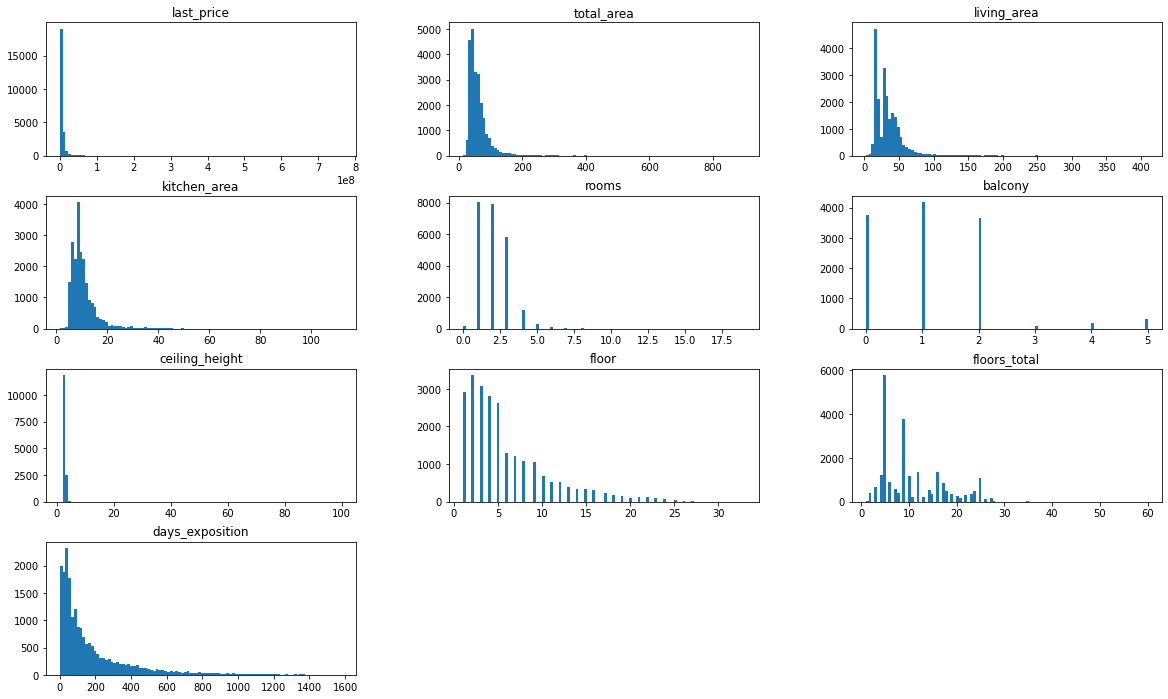

In [8]:
df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'balcony', 'ceiling_height', 'floor', 'floors_total',
    'days_exposition']].hist(bins=100, figsize=(20,12), grid=False);

Предоставленные данные нормально распределены, нет сильно выделяющихся баров в гистограммах. Далее рассмотрим данные более детально, а пока подготовим датасет для дальнейшей работы.

## Предобработка данных

### Обработаем пропуски в таблице данных о недвижимости.

In [9]:
# посчитаем количество дубликатов

df.duplicated().sum()

0

Дубликаты отсутствуют.

In [10]:
# посчитаем количество пропусков в данных для каждого столбца

df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [11]:
# представим данные в виде долей.

df.isna().mean().sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_centers_nearest    0.232879
ponds_around_3000       0.232837
parks_around_3000       0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

Из таблицы видно, что наибольшее количество пропусков в столбце is_apartment. Доля апартаментов в общем пуле обьектов недвижимости составляет около 0,02%, что не соответсвтует статистике, ведь на конец 2019 года доля апартаментов в Санкт-Петербурге составляла <a href="https://www.novostroy-spb.ru/novosti/apartamenty_zanyali_desyatuyu_chast#:~:text=К%20концу%202019%20года%20доля,скорее%20всего%2C%20он%20будет%20увеличиваться" title='Портал'>10%</a>. В дальнейшем не удастся выявиться взаимосвязь типа неджимимости и стоимости, но и такой задачи в исследовании нет, столбец можно удалить. В дальнейшем поэтапно разберем каждую категорию пропусков и определим методы заменты пропусков.

In [12]:
# удаляем лишние столбцы

df = df.drop(columns=['total_images', 'is_apartment'])

Обработаем пропущенные значения высоты потолков. Сначала определим медианное значение и средне значение и дальше сопоставим данные со специальными стандартами устанавливающие минимальную высоту потолков в 2,5 метра.

In [13]:
df['ceiling_height'].mean()

2.77149889685604

In [14]:
df['ceiling_height'].median()

2.65

Ближе значению соответсвующему специальному стандарту получилось значение медианы, заменим ей пропущенные значения.

In [15]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

Применим метод замены пропущенных значений нулями к столбцам balcony и floors_total, поскольку пропуски носят не случайный характер т.к. при отсутствии балкона поле скорее всего не заполнялось, а доля пропусков в количестве этаже настолько мала, замена пропусков не повлияет на выборку.

In [16]:
df['balcony'] = df['balcony'].fillna(0)

In [17]:
df['floors_total'] = df['floors_total'].fillna(0)

In [18]:
# пропуски в названиях населенных пунков заполним словом Неизвестно.

df['locality_name'] = df['locality_name'].fillna('Неизвестно')

Пропуски в размерах жилой площади и кухни заменим медианой по количеству комнат.

In [19]:
for i in df['rooms'].unique():
    df.loc[(df['rooms'] == i) & (df['living_area'].isna()), 'living_area'] = \
    df.loc[(df['rooms'] == i), 'living_area'].mean()

In [20]:
for i in df['rooms'].unique():
    df.loc[(df['rooms'] == i) & (df['kitchen_area'].isna()), 'kitchen_area'] = \
    df.loc[(df['rooms'] == i), 'kitchen_area'].mean()

Доля пропусков следующих столбцов существенная, удалив строки мы лишимся важной статистической информации. Поэтому заменим пропуски на нули.

In [21]:
df.fillna(value={'parks_around_3000': 0, 'ponds_around_3000': 0, 'city_centers_nearest': 0, 'airports_nearest': 0,
    'ponds_nearest': 0, 'parks_nearest': 0, 'days_exposition': 0}, inplace=True)

In [22]:
df.isna().sum().sort_values(ascending=False)

kitchen_area            197
total_area                0
ponds_nearest             0
ponds_around_3000         0
parks_nearest             0
parks_around_3000         0
city_centers_nearest      0
airports_nearest          0
locality_name             0
balcony                   0
last_price                0
open_plan                 0
studio                    0
floor                     0
living_area               0
floors_total              0
ceiling_height            0
rooms                     0
first_day_exposition      0
days_exposition           0
dtype: int64

### Изменим тип данных, где это необходимо.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price            23699 non-null  float64
 1   total_area            23699 non-null  float64
 2   first_day_exposition  23699 non-null  object 
 3   rooms                 23699 non-null  int64  
 4   ceiling_height        23699 non-null  float64
 5   floors_total          23699 non-null  float64
 6   living_area           23699 non-null  float64
 7   floor                 23699 non-null  int64  
 8   studio                23699 non-null  bool   
 9   open_plan             23699 non-null  bool   
 10  kitchen_area          23502 non-null  float64
 11  balcony               23699 non-null  float64
 12  locality_name         23699 non-null  object 
 13  airports_nearest      23699 non-null  float64
 14  city_centers_nearest  23699 non-null  float64
 15  parks_around_3000  

In [24]:
# поменяем значения first_day_exposition на формат даты

df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# приведет остальные значения к целочисленным значениям, где не требуются значения после запятой

column_list = ['floors_total', 'balcony','last_price', 'airports_nearest', 'city_centers_nearest',
    'parks_around_3000', 'parks_nearest', 'ponds_around_3000', 'ponds_nearest', 'days_exposition']
for column in column_list:
    df[column] = df[df[column].notna()][column].astype('int64')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23699 non-null  int64         
 1   total_area            23699 non-null  float64       
 2   first_day_exposition  23699 non-null  datetime64[ns]
 3   rooms                 23699 non-null  int64         
 4   ceiling_height        23699 non-null  float64       
 5   floors_total          23699 non-null  int64         
 6   living_area           23699 non-null  float64       
 7   floor                 23699 non-null  int64         
 8   studio                23699 non-null  bool          
 9   open_plan             23699 non-null  bool          
 10  kitchen_area          23502 non-null  float64       
 11  balcony               23699 non-null  int64         
 12  locality_name         23699 non-null  object        
 13  airports_nearest

### Изучим столбец с названиями населенных пунктов и устраним неявные дубликаты.

In [26]:
# получим список всех уникальных значений

df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Неизвестно',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
       'го

In [27]:
df = df.apply(lambda x: x.replace({'деревня Кудрово': 'Кудрово', 'поселок Мурино': 'Мурино','посёлок': 'поселок', 'городской поселок': 'поселок', 'городской посёлок': 'поселок',
    'поселок городского типа': 'поселок', 'посёлок городского типа': 'поселок', 'коттеджный посёлок': 'поселок',
    'коттеджный поселок': 'поселок', 'посёлок при железнодорожной станции': 'поселок станции', 'посёлок станции': 'поселок станции',
    'садоводческое некоммерческое товарищество': 'садовое товарищество'}, regex=True))

Привели названия населенных пунктов к одному виду, заменив названия "посёлок" на "поселок" и т.д.

In [65]:
# колчичество населенных пунктов

len(df['locality_name'].unique())

338

### Найдем редкие и выбивающиеся значения.

In [29]:
# из описательной статистики мы увидели аномальные значения в столбце ceiling_height, рассмотрим далее

df.sort_values(by='ceiling_height', ascending=False).head(10)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22869,15000000,25.0,2018-07-25,1,100.0,5,14.0,5,False,False,11.00000,5,Санкт-Петербург,34963,8283,1,223,3,30,19
3148,2900000,75.0,2018-11-12,3,32.0,3,53.0,2,False,False,8.00000,0,Волхов,0,0,0,0,0,0,0
22336,9999000,92.4,2019-04-05,2,32.0,6,55.5,5,False,False,16.50000,4,Санкт-Петербург,18838,3506,0,0,3,511,0
21377,4900000,42.0,2017-04-18,1,27.5,24,37.7,19,False,False,11.00000,2,Санкт-Петербург,42742,9760,0,0,0,0,61
4876,3000000,25.0,2017-09-27,0,27.0,25,17.0,17,False,True,NaN,2,поселок Мурино,0,0,0,0,0,0,28
17857,3900000,56.0,2017-12-22,3,27.0,5,33.0,4,False,False,11.30858,0,Санкт-Петербург,41030,15543,0,0,0,0,73
5246,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,False,False,9.00000,2,деревня Мины,0,0,0,0,0,0,540
20478,8000000,45.0,2017-07-18,1,27.0,4,22.0,2,False,False,10.00000,1,Санкт-Петербург,18975,3246,0,0,3,449,429
22938,4000000,98.0,2018-03-15,4,27.0,2,73.0,2,False,False,9.00000,1,деревня Нижняя,0,0,0,0,0,0,27
5807,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,False,False,12.00000,5,Санкт-Петербург,18732,20444,0,0,3,80,38


Исправим аномальные значения высоты потолка, к примеру высота потолка "27" метров есть высота "2,7" метра. Разделим все значения высоты потолка превышаюшие 20 метров на 10.

In [30]:
df.loc[(df['ceiling_height'] >= 20) & (~pd.isna(df['ceiling_height'])),'ceiling_height']  = df['ceiling_height'] / 10

Проанализируем важные для исследования параметры, такие как стоимость квартиры, количество комнат и общую площать. В данных имеются аномально высокие значения это было видно на гистограммах и зачениях описательной статистики, достаточно взглянуть на максимальные значения диапазона и разницу между медианой и средне арифметическим, это говорит о том что присутствуют выбросы. Воспользуемся методом построения диаграмм размаха.

<AxesSubplot:>

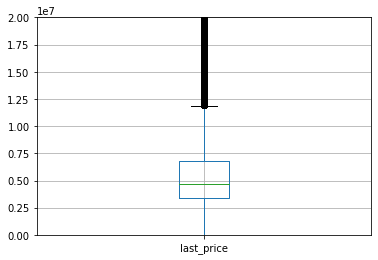

In [31]:
# диаграмма размаха для цены объекта

plt.ylim(0, 20000000)
df.boxplot(['last_price'])

<AxesSubplot:>

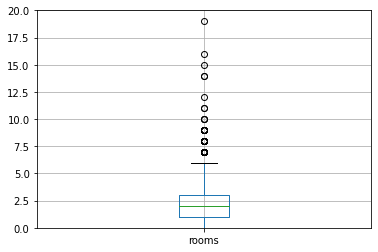

In [32]:
# диаграмма размаха для количества комнат

plt.ylim(0, 20)
df.boxplot(['rooms'])

<AxesSubplot:>

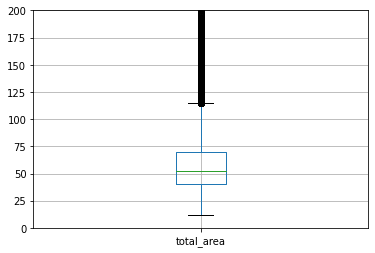

In [33]:
# диаграмма размаха для общей площади

plt.ylim(0, 200)
df.boxplot(['total_area'])

- На диаграмме размаха видно большое количество выбросов за пределами нормальных значений, начиная с цены 15 млн. будем считать это верхней границей. Медианное значение составляет около  5 млн.
- На диаграмме количества комнат предел нормальных значений - 6 комнат, свыше идут выбросы вплоть до 19  комнат, эти данные также исключим из выборки.
- Общая площать составляет  от 40 до 60 м, с медианой 55. Разброс значений от 10 до 120 метро за объект недвижимости

In [34]:
# обновим данные датасета в соотвествии с новыми параметрами

good_df = df[(df['last_price'] >=1000000) & (df['last_price'] <=15000000) & \
            (df['rooms'] >=1) & (df['rooms'] <= 6)  & \
            (df['total_area'] >=10) & (df['total_area'] <=120)]

In [35]:
good_df.shape[0] / df.shape[0]

0.9189417274990506

Отбросили порядка 8% данных, что является допустимым.

## Добавим в таблицу новые столбцы

Дополним дата сет новыми столбцами, добавим количественные и категориальные значения для выявления взаимосвязей.

In [36]:
# столбец с информацией о цене за квадратный метр

good_df['price_qm'] = np.round(good_df['last_price']/good_df['total_area'])

In [37]:
# столбцы о годах, месяцах и днях. Например определить, в каком месяце больше всего продаж

good_df['day'] = good_df['first_day_exposition'].dt.weekday
good_df['month'] = good_df['first_day_exposition'].dt.month
good_df['year'] = good_df['first_day_exposition'].dt.year

# создадим список дней недели

day_to_number = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
good_df['day'] = good_df['day'].map(day_to_number)

In [38]:
# добавим категорию типа этажа

def floor_type(df):
    if df['floor'] == 1:
        return 'первый'
    elif df['floor'] == df['floors_total']:
        return 'последний'
    else:
        return 'другой'

good_df['floor_type'] = good_df.apply(floor_type, axis=1)

In [39]:
# добавим расстояние до центра города

good_df['dist_to_center'] = np.round(good_df['city_centers_nearest'] / 1000)

In [40]:
good_df.head().reset_index() # проверям обновленный датафрейм

,index,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_qm,day,month,year,floor_type,dist_to_center
0,0,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,0,120370.0,Thu,3,2019,другой,16.0
1,1,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,11.0,2,поселок Шушары,12817,18603,0,0,0,0,81,82921.0,Tue,12,2018,первый,19.0
2,2,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92786.0,Thu,8,2015,другой,14.0
3,4,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000.0,Tue,6,2018,другой,8.0
4,5,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,False,9.1,0,городской поселок Янино-1,0,0,0,0,0,0,55,95066.0,Mon,9,2018,другой,0.0


## Проведем исследовательский анализ данных

### Воспользуемся методом описательной статистики, будем обращать внимание на средние значения и пределы нормальных значений.

In [41]:
good_df.describe()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_qm,month,year,dist_to_center
count,2.177800e+04,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000,21778.000000
mean,5.135093e+06,54.376445,1.966618,2.679449,10.778630,31.156867,5.924741,9.854967,0.594453,22016.865369,11257.047663,0.434705,159.363991,0.550923,195.229038,153.372762,94382.378823,6.397144,2017.381486,11.252824
std,2.581256e+06,19.149644,0.893326,0.227548,6.638245,13.605975,4.909848,3.948043,0.952377,16687.377958,9739.323270,0.715536,299.761956,0.846973,305.739254,207.739488,30602.670336,3.488276,1.026861,9.741825
min,1.000000e+06,12.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13483.000000,1.000000,2014.000000,0.000000
25%,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.000000,2.000000,7.100000,0.000000,9849.000000,2300.000000,0.000000,0.000000,0.000000,0.000000,24.000000,76022.000000,3.000000,2017.000000,2.000000
50%,4.500000e+06,50.300000,2.000000,2.650000,9.000000,30.000000,4.000000,9.490000,0.000000,21392.500000,11714.000000,0.000000,0.000000,0.000000,0.000000,73.000000,93750.000000,6.000000,2017.000000,12.000000
75%,6.249375e+06,65.100000,3.000000,2.700000,16.000000,40.000000,8.000000,11.180000,1.000000,34945.000000,15534.000000,1.000000,275.750000,1.000000,375.000000,194.000000,111284.500000,10.000000,2018.000000,16.000000
max,1.500000e+07,120.000000,6.000000,14.000000,60.000000,130.983636,33.000000,64.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,600000.000000,12.000000,2019.000000,66.000000


Построим гистограммы по следующим объектам:

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

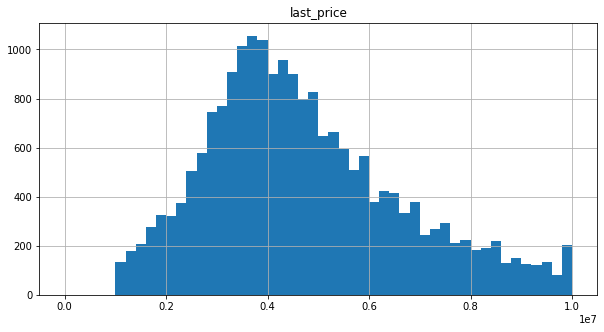

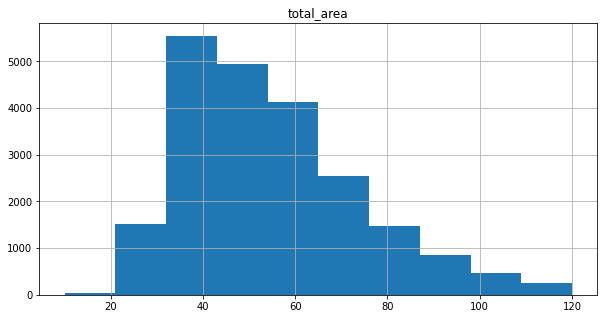

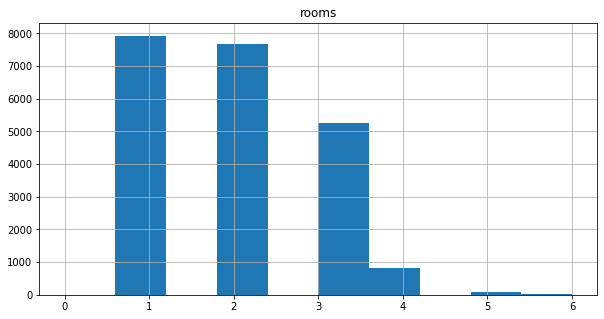

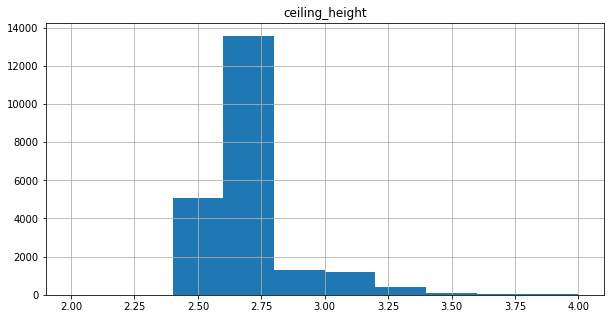

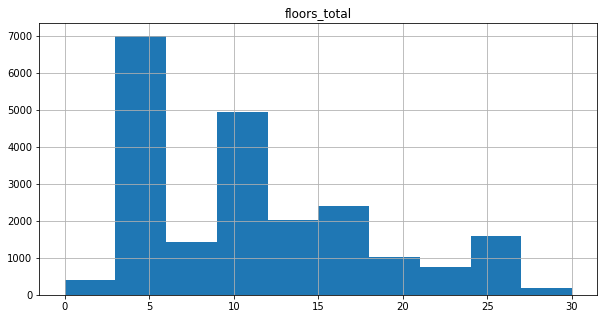

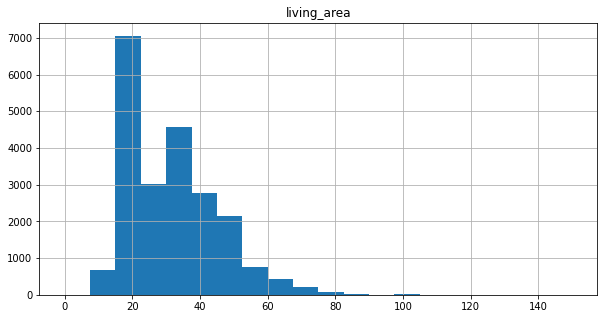

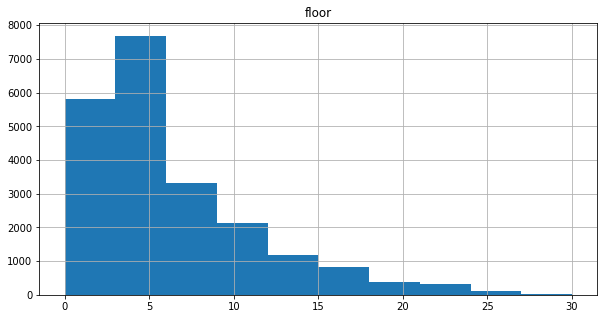

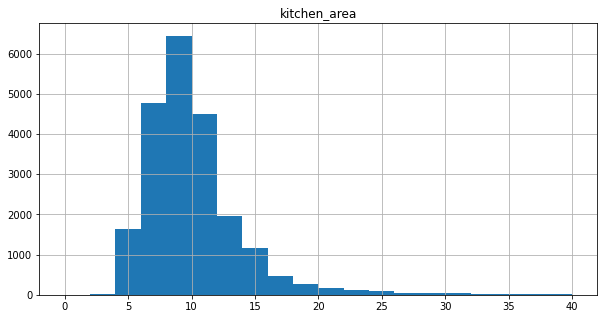

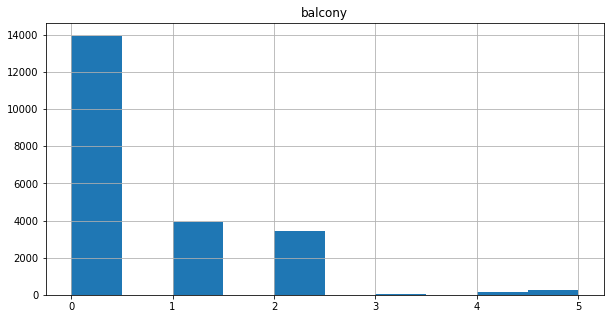

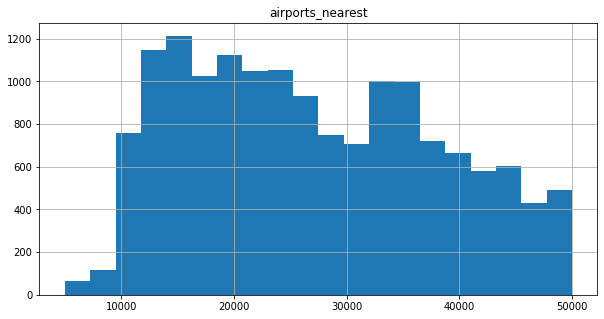

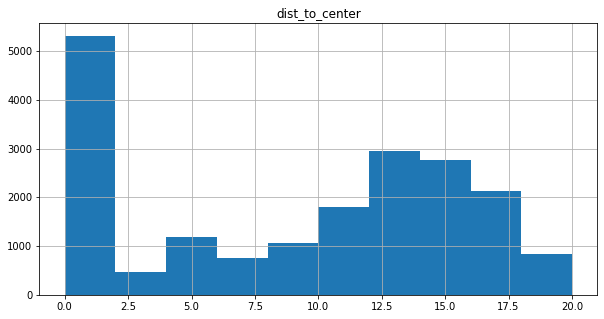

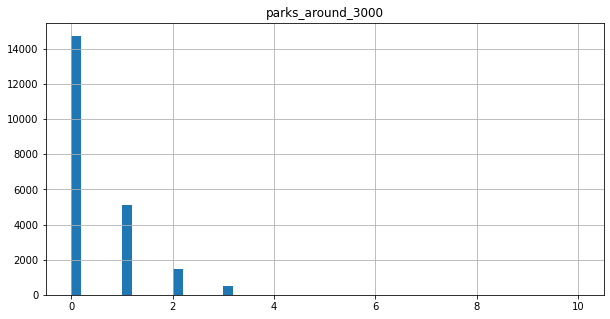

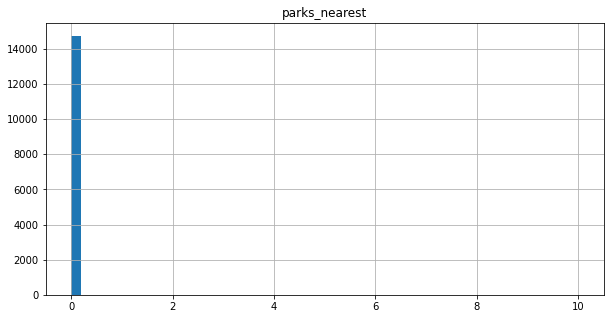

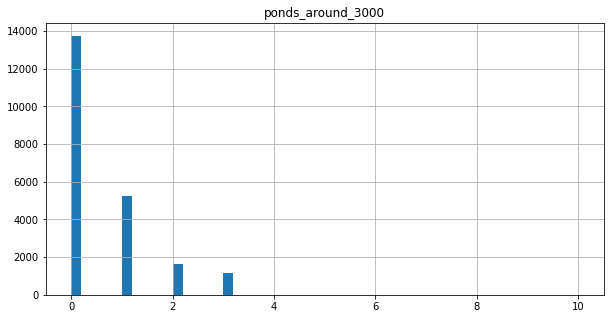

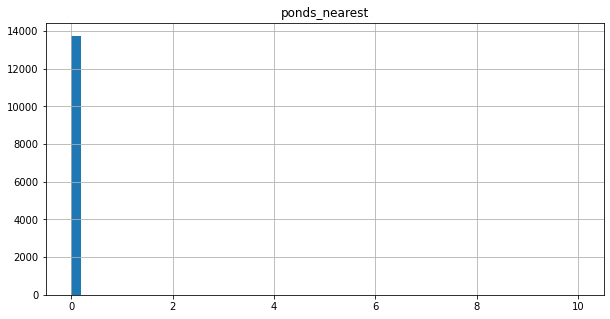

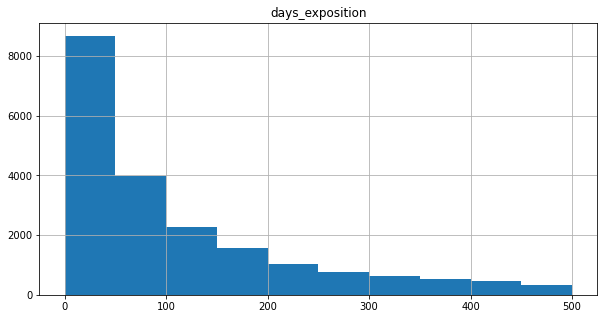

In [42]:
good_df.hist('last_price', bins=50, range=(0, 10000000), figsize=(10,5), grid=True)
good_df.hist('total_area', bins=10, range=(10, 120), figsize=(10,5), grid=True)
good_df.hist('rooms',  range=(0, 6), figsize=(10,5), grid=True)
good_df.hist('ceiling_height', bins=10, range=(2, 4), figsize=(10,5), grid=True)
good_df.hist('floors_total', bins=10, range=(0, 30), figsize=(10,5), grid=True)
good_df.hist('living_area',bins=20, range=(0, 150), figsize=(10,5), grid=True)
good_df.hist('floor', bins=10, range=(0, 30), figsize=(10,5), grid=True)
good_df.hist('kitchen_area', bins=20, range=(0, 40), figsize=(10,5), grid=True)
good_df.hist('balcony', range=(0, 5), figsize=(10,5), grid=True)
good_df.hist('airports_nearest', bins=20, range=(5000, 50000), figsize=(10,5), grid=True)
good_df.hist('dist_to_center', bins=10, range=(0, 20), figsize=(10,5), grid=True)
good_df.hist('parks_around_3000', bins=50, range=(0, 10), figsize=(10,5), grid=True)
good_df.hist('parks_nearest', bins=50, range=(0, 10), figsize=(10,5), grid=True)
good_df.hist('ponds_around_3000', bins=50, range=(0, 10), figsize=(10,5), grid=True)
good_df.hist('ponds_nearest', bins=50, range=(0, 10), figsize=(10,5), grid=True)
good_df.hist('days_exposition', bins=10, range=(0, 500), figsize=(10,5), grid=True)

<AxesSubplot:>

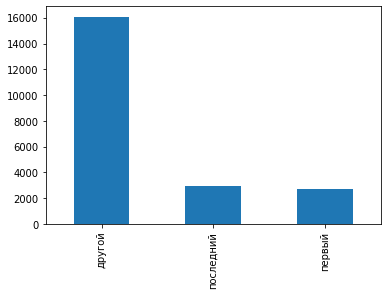

In [43]:
good_df['floor_type'].value_counts().plot.bar()

<AxesSubplot:>

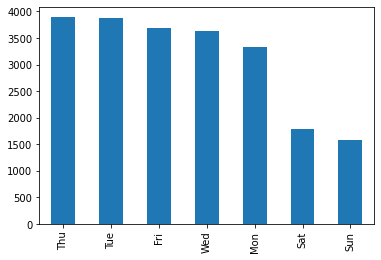

In [44]:
good_df['day'].value_counts().plot.bar()

<AxesSubplot:>

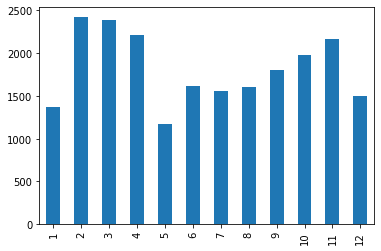

In [45]:
good_df['month'].value_counts().sort_index(ascending=True).plot.bar()

<AxesSubplot:>

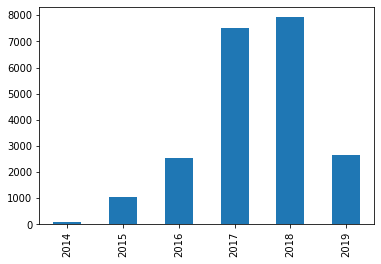

In [46]:
good_df['year'].value_counts().sort_index(ascending=True).plot.bar()

**Изучив гистограмм составим общие выводы об объектах недвижимости в Санкт-Петербурге и области:**
    
- в среднем квартиры продавались по цене от 2,5 млн. до 5,5 млн. руб.
- площать квартир от 40 до 60 метров, с объемом кухни 6-11 метров
- в продаже в основном 1 и 2 комнатные квартиры в 5-ти этажных домах
- высота потолков от 2,5 до 2,75 м
- до ближайшего аэропорта 12-25 км
- большая часть объявлений размещается на срок 30-60 дней
- не часто продаются квартиры на первых и последнем этажах
- объявления в основом размещаются в рабочие дни, а по времени года характерно повышение объявлений в первом квартале года, снижение летом, затем плавное повышение в третьем квартале и падение активности к новому году. Пиком продаж были 2017 и 2018 года, в 2019 было снижение активности более чем в два раза.
- в выборке много объявлений из области, где расстояние до центра небольшое, поэтому большинство значений до 2-х км
- территориальное расположение как правило не располагает наличие парка или пруда

### Изучим подробнее столбец days_exposition, как быстро продавались квартиры.

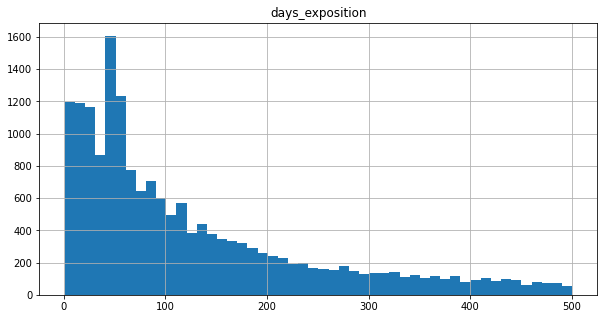

In [47]:
good_df.hist('days_exposition', bins=50, range=(1, 500), figsize=(10,5), grid=True);

In [48]:
# уберем из расчетов нулевые значения

days_exposition = good_df.query('days_exposition > 0')['days_exposition']

In [49]:
days_exposition.describe()

count    19066.000000
mean       175.188923
std        213.242704
min          1.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64

Средний срок продажи квартиры с даты публикации до снятия с продажи составляет 180 дней, медианное значение - 95 дней. Как видно из гистограммы большая часть квартир продается за 3 месяца. Пиковые значения в диапазоне 30, 90, 120 дней говорит о том, что объявления снимались с продажи по условловиям оплаченного времени размещения объявления. Объявления со сроком публикации свыше 180 дней можно считать слабо ликвидными.

### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта.

Корреляция с общей площадью:  0.6536750579657242


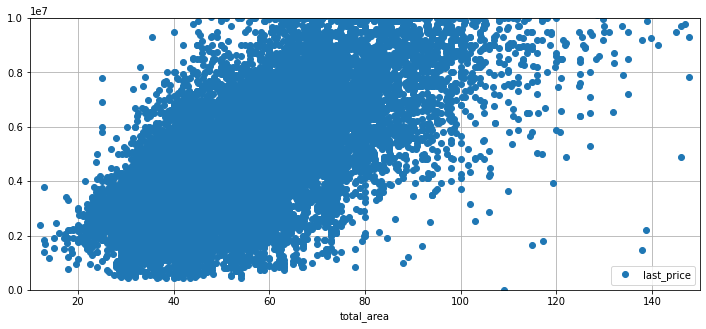

In [50]:
(df
    .plot(x='total_area',
    y='last_price',
    style='o',
    xlim=(10, 150),
    ylim=(0, 10000000),
    figsize=(12, 5),
    grid=True)
)
print('Корреляция с общей площадью: ', df['total_area'].corr(df['last_price']))

Корреляция с жилой площадью:  0.5564104267344321


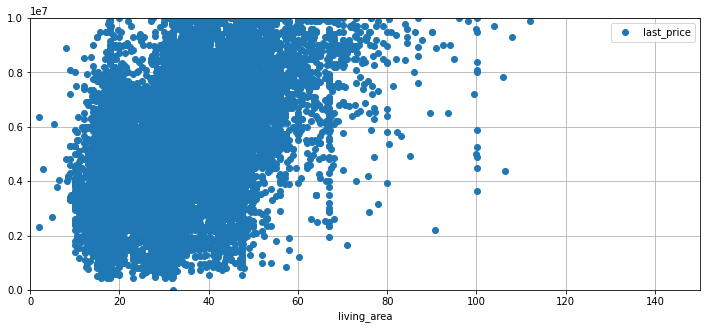

In [51]:
(df
    .plot(x='living_area',
    y='last_price',
    style='o',
    xlim=(0, 150),
    ylim=(0, 10000000),
    figsize=(12, 5),
    grid=True)
)
print('Корреляция с жилой площадью: ', df['living_area'].corr(df['last_price']))

Корреляция с площадью кухни:  0.4579284007220623


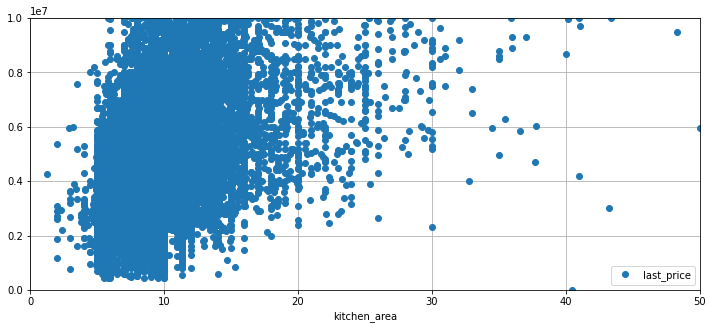

In [52]:
(df
    .plot(x='kitchen_area',
    y='last_price',
    style='o',
    xlim=(0, 50),
    ylim=(0, 10000000),
    figsize=(12, 5),
    grid=True)
)
print('Корреляция с площадью кухни: ', df['kitchen_area'].corr(df['last_price']))

Корреляция с количеством комнат:  0.3633428499648948


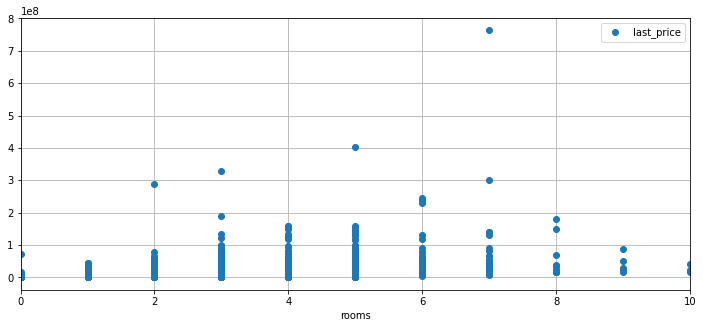

In [53]:
(df
    .plot(x='rooms',
    y='last_price',
    style='o',
    xlim=(0, 10),
    figsize=(12, 5),
    grid=True)
)
print('Корреляция с количеством комнат: ', df['rooms'].corr(df['last_price']))

**Вывод:** на стоимость объекта недвижимости сильнее всего влияет общая площадь.

### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [54]:
# top-10 населенных пунктов по количеству объявлений

good_df['locality_name'].value_counts().head(10)

Санкт-Петербург      14199
поселок Мурино         495
Кудрово                451
поселок Шушары         435
Всеволожск             387
Пушкин                 345
Колпино                336
поселок Парголово      322
Гатчина                303
Выборг                 228
Name: locality_name, dtype: int64

In [55]:
# напишем функцию которая будет определять среднюю стоимость квадратного метра в населенном пункте

def local_price_qm(city):
    local_price = good_df[good_df['locality_name'] == city]
    local_price_count = local_price['price_qm'].mean()
    return local_price_count

Выведем на экран стоимость квадратного метра для top-10 населенных пунктов по количеству объявлений.

In [56]:
info = {'city':['Санкт-Петербург', 'поселок Мурино', 'Кудрово', 'поселок Шушары', 'Всеволожск', 'Пушкин', 'Колпино',
                'поселок Парголово', 'Гатчина', 'Выборг'],
        'price_qm':[local_price_qm('Санкт-Петербург'), local_price_qm('поселок Мурино'),local_price_qm('Кудрово'),
                   local_price_qm('поселок Шушары'),local_price_qm('Всеволожск'),local_price_qm('Пушкин'),
                   local_price_qm('Колпино'),local_price_qm('поселок Парголово'),local_price_qm('Гатчина'),
                   local_price_qm('Выборг'),]}
                  
pd.DataFrame(info).sort_values(by='price_qm', ascending=False).reset_index(drop=True)

,city,price_qm
0,Санкт-Петербург,107502.593563
1,Пушкин,101252.292754
2,Кудрово,95150.988914
3,поселок Парголово,90448.400621
4,поселок Мурино,85031.769697
5,поселок Шушары,78393.827586
6,Колпино,75370.017857
7,Гатчина,69110.927393
8,Всеволожск,67226.087855
9,Выборг,58786.964912


In [57]:
good_df.groupby('locality_name')['price_qm'].agg(['count', 'mean']).sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,14199,107502.593563
поселок Мурино,495,85031.769697
Кудрово,451,95150.988914
поселок Шушары,435,78393.827586
Всеволожск,387,67226.087855
Пушкин,345,101252.292754
Колпино,336,75370.017857
поселок Парголово,322,90448.400621
Гатчина,303,69110.927393


Выведем **десять** населенных пунктов где стоимость квадратного метра самая **высокая**.

In [58]:
good_df.groupby('locality_name')['price_qm'].agg('mean').sort_values(ascending=False)[:10]

locality_name
Санкт-Петербург      107502.593563
Зеленогорск          102890.380952
Сестрорецк           101318.276471
Пушкин               101252.292754
поселок Лисий Нос    100661.000000
деревня Мистолово     98550.000000
поселок Левашово      96998.000000
Кудрово               95150.988914
поселок Парголово     90448.400621
Неизвестно            89728.600000
Name: price_qm, dtype: float64

Выведем **десять** населенных пунктов где стоимость квадратного метра самая **низкая**.

In [59]:
good_df.groupby('locality_name')['price_qm'].agg('mean').sort_values(ascending=True)[:10]

locality_name
поселок Житково                  15648.000000
поселок Никольский               19577.000000
Бокситогорск                     19600.500000
поселок Оредеж                   19878.000000
Сланцы                           20515.068966
деревня Кисельня                 20909.000000
поселок Плоское                  20913.000000
поселок Торковичи                21075.333333
городской поселок Лесогорский    21301.000000
Пикалёво                         21640.285714
Name: price_qm, dtype: float64

### Вычислим среднюю стоимость каждого километра для квартир в Санкт-Петербурге. Определим, как стоимость объектов зависит от расстояния до центра города.

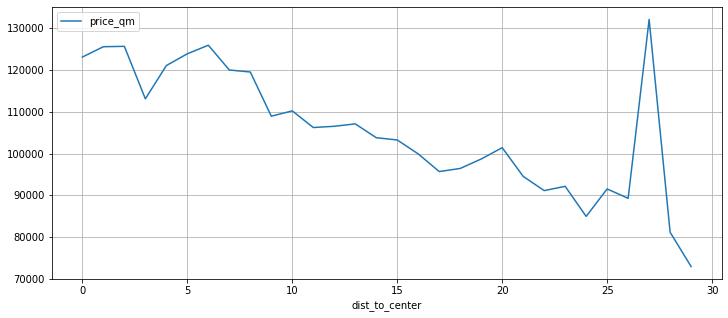

In [60]:
good_df_pivot = (good_df.query('locality_name == "Санкт-Петербург"')
            .pivot_table(index=['dist_to_center'], values='price_qm', aggfunc='mean')
            .plot(grid=True, figsize=(12, 5))
           )

In [61]:
def dist_to_center(row):
    if 0 <= row['dist_to_center'] <= 3:
        return '3 км до центр'
    elif 3 <= row['dist_to_center'] <= 10:
        return '10 км до центра'
    elif 10 <= row['dist_to_center'] <= 15:
        return '15 км до центра'
    else:
        return 'КАД и далее'

In [62]:
good_df['dist_to_center_cat'] = good_df.apply(dist_to_center, axis=1)

In [63]:
(
good_df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index=['dist_to_center_cat'], values='price_qm', aggfunc='mean')
    .sort_values(by='price_qm', ascending=False)
)

,price_qm
dist_to_center_cat,
3 км до центр,120235.337500
10 км до центра,118035.593989
15 км до центра,105379.625567
КАД и далее,96991.487916


**Вывод:** как и следовало ожидать, чем ближе к центру находится объект недвижимости, тем выше цена.

In [64]:
# дата первого и последнего обьявления

good_df['first_day_exposition'].min(), good_df['first_day_exposition'].max()

(Timestamp('2014-11-27 00:00:00'), Timestamp('2019-05-03 00:00:00'))

## Общий вывод

**Резюме**
    
- средняя стоимость квартир, она составляет 2,5 - 5,5 млн. рублей, а диапазон предложений варьирует от 1,2 до 15 и выше млн
- в основном продаются 1 и 2 комнатные квартиры в 5-ти этажных домах, размер кухни в которых составляет от 6 до 11 метров с высотой потолков 2,65
- наибольшее влияние на стоимость квартиры оказывает общая площадь и расстояние до центра города
- больше всего объявлений о продаже было размещено в Санкт-Петербурге, поселке Мурино, Кудрово, Шушары
- самая высокая цена за кв м в Санкт-Петербурге, Сестрорецке, Зеленогорске и городе Пушкин
- самая низка цена за кв м в поселке Житково, Никольском и Боктитогорске 
- до ближайшего аэропорта в среднем 12-25 км  
- большая часть объявлений размещается на срок 30-90 дней
- не часто продаются квартиры на первых и последнем этажах
- территориальное расположение как правило не располагает наличие парка или пруда
- объявления в основом размещаются в рабочие дни, а по времени года характерно повышение объявлений в первом квартале года, снижение летом, затем плавное повышение в третьем квартале и падение активности к новому году. Пиком продаж были 2017 и 2018 года, в 2019 было снижение активности более чем в два раза

**Вывод**

Проведена предобработка архива данных о продаже квартир в Санкт-Петербурге и области за период с ноября 2014 по май 2019 года. Преждем чем приступить к исследованию, был проведен анализ всех данных датасета. Были обнаружены аномальные значения резко выделяющиеся на фоне других цифр, такие как высота потолков 100 м, цена за объект недвижимости более 75 млн., количество комнат превышаюшие пределы нормальных значений - 19 и общий размер объекта недвижимости - квартиры свыше 120 м кв. также не принимались к расчетам т.к. не входили в допустимый предел нормальных значений. Обработаны пропущенные значения для сохранения строк объявлений, совокупные потери данных составили 8% от первоначального датасета. В названиях населенных пунктах были устранены множество неявных дубликатов, присутствовали в названия "посёлки", "поселки" и т.д. В анализе данных применялись методы описательной статистики, использовались диаграммы размаха для определения размеров допустимых значений и аномальных выбросов данных. Графическими методами определяли корреляции, какие факторы больше всего влияют на общую цену обьекта недвижимости. Отсортировали объекты недвижимости с высокой и низкой стоимостью за 1 кв м по каждому населенному пункту и выделили по 10 лидеров в каждой категории.